[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/106_cfd_adv2d/106_cfd_adv2d.ipynb)

In [119]:
from dataclasses import dataclass, field
import numpy as np 
import matplotlib.pyplot as plt

@dataclass
class Point:
	x: float
	y: float

@dataclass
class Vertex:
	p: Point

@dataclass
class Face:
	v: list[Vertex]
	c: Point

	def __post_init__(self):
		assert len(self.v) == 2

	def area(self) -> float:
		return ((self.v[1].p.x - self.v[0].p.x)**2 + (self.v[1].p.y - self.v[0].p.y)**2)**0.5

@dataclass
class Cell:
	f: list[Face]
	c: Point

	def __post_init__(self):
		assert len(self.f) == 4

	def volume(self) -> float:
		return self.f[0].area() * self.f[1].area() 

@dataclass
class Mesh:
	Nx: int
	Ny: int
	Lx: list[float] 
	Ly: list[float] 

	v: list[Vertex] = field(init=False)
	f: list[Face] = field(init=False)
	c: list[Cell] = field(init=False)

	def __post_init__(self):
		vx = np.linspace(self.Lx[0], self.Lx[1], self.Nx+1)
		vy = np.linspace(self.Ly[0], self.Ly[1], self.Ny+1)
		self.v = [Vertex(Point(x, y)) for y in vy for x in vx]
		fh = [Face([self.v[i + (self.Nx+1)*j], self.v[i+1+ (self.Nx+1)*j]], Point((vx[i]+vx[i+1])/2, vy[j])) for j in range(self.Ny+1) for i in range(self.Nx)]
		fv = [Face([self.v[i + j*(self.Nx+1)], self.v[i+ (self.Nx+1)+j*(self.Nx+1)]], Point(vx[i], (vy[j]+vy[j+1])/2)) for j in range(self.Ny) for i in range(self.Nx+1)]
		self.f = fh + fv
		self.c = [Cell([fv[i], fh[j+1], fv[i+1], fh[j]], Point((vx[i]+vx[i+1])/2, (vy[j]+vy[j+1])/2)) for j in range(self.Ny) for i in range(self.Nx)]

	def plot(self):
		plt.scatter([v.p.x for v in self.v], [v.p.y for v in self.v])
		for f in self.f:
			plt.plot([v.p.x for v in f.v], [v.p.y for v in f.v], 'r-')
			plt.plot(f.c.x, f.c.y, 'Xr')
		for c in self.c:
			plt.plot(c.c.x, c.c.y, '^g')
		plt.show()		

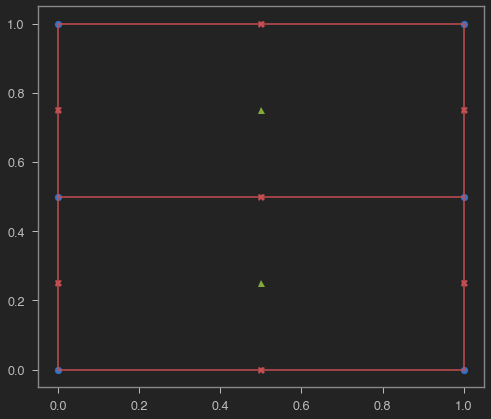

In [120]:
mesh = Mesh(1, 2, [0, 1], [0, 1])
mesh.plot()
